In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#pd.set_option('max_columns', 200)

In [2]:
data_train = pd.read_csv('HousePrediction_kaggle/train.csv')
data_test =  pd.read_csv('HousePrediction_kaggle/test.csv')
#data_train.columns = ['Pid','Survived', 'Pclass','Name','Sex','Age','Sibsp','Parch','Ticket','Fare','Cabin','Embarked']
#data_test.columns =  ['Pid', 'Pclass','Name','Sex','Age','Sibsp','Parch','Ticket','Fare','Cabin','Embarked']

print(len(data_train));
print(len(data_test));


1460
1459


In [3]:
data_train.info()
data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
data_train.shape


(1460, 81)

In [5]:
data_test.shape

(1459, 80)

In [6]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Feature engineering will start from here

In [8]:
print(data_train.isnull().sum().head(60))

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [9]:
print(data_train.isnull().sum().tail(21))
#print(data_train['FireplaceQu'].isnull().sum())

GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64


In [10]:
# Now removing the columns with large number of missing values from training set
drop_columns = ['FireplaceQu','PoolQC','Fence','MiscFeature']
data_train.drop(drop_columns, axis = 1, inplace = True)
data_test.drop(drop_columns, axis = 1, inplace = True)

In [11]:
data_train.shape

(1460, 77)

In [12]:
data_test.shape

(1459, 76)

In [13]:
print(data_train.isnull().sum().head(60))

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [14]:
print(data_train.isnull().sum().tail(21))

Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
SalePrice         0
dtype: int64


Feature Engineering on Basement Features::::::

In [15]:
combine = [data_train, data_test]
print("Before", data_train.shape, data_test.shape,combine[0].shape, combine[1].shape)

Before (1460, 77) (1459, 76) (1460, 77) (1459, 76)


In [16]:
titlemapping = {'Ex':5, 'Gd':4,'TA':3, 'Fa':2,'Po':1}
for row in combine:
    row["BsmtQual"] = row["BsmtQual"].map(titlemapping)
    row['BsmtQual'] = row['BsmtQual'].fillna(0)

In [17]:
titlemapping = {'Ex':5, 'Gd':4,'TA':3, 'Fa':2,'Po':1}
for row in combine:
    row["BsmtCond"] = row["BsmtCond"].map(titlemapping)
    row['BsmtCond'] = row['BsmtCond'].fillna(0)

In [18]:
titlemapping = {'Gd':4, 'Av':3,'Mn':2, 'No':1}
for row in combine:
    row["BsmtExposure"] = row["BsmtExposure"].map(titlemapping)
    row['BsmtExposure'] = row['BsmtExposure'].fillna(0)

In [19]:
#BsmtFinType1
titlemapping = {'GLQ':6, 'ALQ':5,'BLQ':4, 'REC':3, 'LWQ':2 ,'Unf':1 }
for row in combine:
    row["BsmtFinType1"] = row["BsmtFinType1"].map(titlemapping)
    row['BsmtFinType1'] = row['BsmtFinType1'].fillna(0)

In [20]:
#BsmtFinType2: 
titlemapping = {'GLQ':6, 'ALQ':5,'BLQ':4, 'REC':3, 'LWQ':2 ,'Unf':1 }
for row in combine:
    row["BsmtFinType2"] = row["BsmtFinType2"].map(titlemapping)
    row['BsmtFinType2'] = row['BsmtFinType2'].fillna(0)

In [21]:
#Drop BsmtFinSF1 , BsmtFinSF2, BsmtUnfSF, TotalBsmtSF from combine.

data_train = data_train.drop(['BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'],axis = 1)
data_test = data_test.drop(['BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'],axis = 1)
combine = [data_train, data_test]
data_train.shape, data_test.shape


((1460, 73), (1459, 72))

In [22]:
# Now, Create a new column in combine data set "Basement Rating" rates 0-5, and drop 
#BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
for dataset in combine:
    dataset["BsmtRating"] = 0
    
for row in combine:
    row.loc[(row["BsmtQual"] == 6) & (row["BsmtCond"] == 6) & (row["BsmtFinType1"] == 6) & (row["BsmtFinType2"] == 6),'BsmtRating'] = 5
    row.loc[(row["BsmtQual"] == 5) & (row["BsmtCond"] == 5) & (row["BsmtFinType1"] == 5) & (row["BsmtFinType2"] == 5),'BsmtRating'] = 5
    
    row.loc[(row["BsmtQual"] == 4) & (row["BsmtCond"] == 4) & (row["BsmtFinType1"] == 4) & (row["BsmtFinType2"] == 4),'BsmtRating'] = 4
    row.loc[(row["BsmtQual"] == 3) & (row["BsmtCond"] == 3) & (row["BsmtFinType1"] == 3) & (row["BsmtFinType2"] == 3),'BsmtRating'] = 3
    row.loc[(row["BsmtQual"] == 2) & (row["BsmtCond"] == 2) & (row["BsmtFinType1"] == 2) & (row["BsmtFinType2"] == 2),'BsmtRating'] = 2
    row.loc[(row["BsmtQual"] == 1) & (row["BsmtCond"] == 1) & (row["BsmtFinType1"] == 1) & (row["BsmtFinType2"] == 1),'BsmtRating'] = 1
    row.loc[(row["BsmtQual"] == 0) & (row["BsmtCond"] == 0) & (row["BsmtFinType1"] == 0) & (row["BsmtFinType2"] == 0),'BsmtRating'] = 0
   


In [23]:
data_train = data_train.drop(['BsmtQual', 'BsmtCond','BsmtFinType1','BsmtFinType2'],axis = 1)
data_test = data_test.drop(['BsmtQual', 'BsmtCond','BsmtFinType1','BsmtFinType2'],axis = 1)
combine = [data_train, data_test]
data_train.shape, data_test.shape

((1460, 70), (1459, 69))

By carefully look at the data set, there are some columns which can easily be merged as seen above

In [24]:
for dataset in combine:
    dataset["Strrettohouse"] = 0
for row in combine:
    row.loc[(row["Street"] == 'Gravel') & (row["Alley"] == 'Gravel') ,'Strrettohouse'] = 2
    row.loc[(row["Street"] == 'Paved') & (row["Alley"] == 'Paved') ,'Strrettohouse'] = 1

In [25]:
#ExterQuality

In [26]:
for dataset in combine:
    dataset["ExterQuality"] = 0
    
titlemapping = {'Ex':5, 'Gd':3,'TA':2, 'Fa':1, 'Po':1  }
for row in combine:
    row["ExterQual"] = row["ExterQual"].map(titlemapping)
    row["ExterCond"] = row["ExterCond"].map(titlemapping)

for row in combine:
    row.loc[(row["ExterQual"] == 5) & (row["ExterCond"] == 5) ,'ExterQuality'] = 5
    row.loc[(row["ExterQual"] == 4) & (row["ExterCond"] == 4) ,'ExterQuality'] = 4
    row.loc[(row["ExterQual"] == 3) & (row["ExterCond"] == 3) ,'ExterQuality'] = 3
    row.loc[(row["ExterQual"] == 2) & (row["ExterCond"] == 2) ,'ExterQuality'] = 2
    row.loc[(row["ExterQual"] == 1) & (row["ExterCond"] == 1) ,'ExterQuality'] = 1

In [27]:
#Delete 
data_train = data_train.drop(['Street', 'OverallQual','Alley','ExterQual','ExterCond'],axis = 1)
data_test = data_test.drop(['Street', 'OverallQual','Alley','ExterQual','ExterCond'],axis = 1)
combine = [data_train, data_test]
data_train.shape, data_test.shape

((1460, 67), (1459, 66))

In [28]:
#Again checking null values:::::
for dataset in combine:
    dataset["GarQuality"] = 0
titlemapping = {'Ex':5, 'Gd':3,'TA':2, 'Fa':1, 'Po':1, 'NA':0 }
for row in combine:
    row["GarageQual"] = row["GarageQual"].map(titlemapping)
    row["GarageCond"] = row["GarageCond"].map(titlemapping)
for row in combine:
    row.loc[(row["GarageQual"] == 5) & (row["GarageCond"] == 5) ,'ExterQuality'] = 5
    row.loc[(row["GarageQual"] == 4) & (row["GarageCond"] == 4) ,'ExterQuality'] = 4
    row.loc[(row["GarageQual"] == 3) & (row["GarageCond"] == 3) ,'ExterQuality'] = 3
    row.loc[(row["GarageQual"] == 2) & (row["GarageCond"] == 2) ,'ExterQuality'] = 2
    row.loc[(row["GarageQual"] == 1) & (row["GarageCond"] == 1) ,'ExterQuality'] = 1
    row.loc[(row["GarageQual"] == 0) & (row["GarageCond"] == 0) ,'ExterQuality'] = 0

In [29]:
#Delete 
data_train = data_train.drop(['GarageQual', 'GarageCond'],axis = 1)
data_test = data_test.drop(['GarageQual', 'GarageCond'],axis = 1)
combine = [data_train, data_test]
data_train.shape, data_test.shape

((1460, 66), (1459, 65))

In [30]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtRating,Strrettohouse,ExterQuality,GarQuality
0,1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,0,0,2,0
1,2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,181500,0,0,2,0
2,3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,223500,0,0,2,0
3,4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,140000,0,0,2,0
4,5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,250000,0,0,2,0


In [31]:
#Mode for Electrical
freq_port = data_train.Electrical.dropna().mode()[0]
for dataset in combine:
    dataset['Electrical'] = dataset['Electrical'].fillna(freq_port)


YearBuilt
YearRemodAdd

1stFlrSF
2ndFlrSF

In [32]:
#Delete 
data_train = data_train.drop(['Condition2', 'Exterior2nd'],axis = 1)
data_test = data_test.drop(['Condition2', 'Exterior2nd'],axis = 1)
combine = [data_train, data_test]
data_train.shape, data_test.shape

((1460, 64), (1459, 63))

In [33]:
titlemapping = {'N':0, 'Y':1 }
for row in combine:
    row["CentralAir"] = row["CentralAir"].map(titlemapping)

In [34]:
#Mean of LotFrontage
mean = data_train['LotFrontage'].median()
data_train['LotFrontage'].fillna(mean, inplace=True)
data_test['LotFrontage'].fillna(mean, inplace=True)
data_train.isnull().sum().head(60) 
#GarageType
data_train['GarageType'].describe()
freq_port = data_train.GarageType.dropna().mode()[0]
freq_port2 = data_train.GarageYrBlt.dropna().mode()[0]
freq_port3 = data_train.GarageFinish.dropna().mode()[0]



for dataset in combine:
    dataset['GarageType'] = dataset['GarageType'].fillna(freq_port)
    dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(freq_port2)
    dataset['GarageFinish'] = dataset['GarageFinish'].fillna(freq_port3)


In [35]:
data_train.describe(include=['O'])

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,Heating,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,4,4,2,5,3,25,9,5,8,...,6,5,5,4,7,6,3,3,9,6
top,RL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,1Fam,1Story,...,GasA,Ex,SBrkr,TA,Typ,Attchd,Unf,Y,WD,Normal
freq,1151,925,1311,1459,1052,1382,225,1260,1220,726,...,1428,741,1335,735,1360,951,686,1340,1267,1198


Correlating.

We want to know how well does each feature correlate with prices of house. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

In [36]:
data_train[['MSZoning','SalePrice']].groupby(['MSZoning'],as_index = False).mean().sort_values(by='SalePrice',ascending = False)


,MSZoning,SalePrice
1,FV,214014.061538
3,RL,191004.994787
2,RH,131558.375000
4,RM,126316.830275
0,C (all),74528.000000


In [37]:
for row in combine:
    row['YrBltAndRemod'] = row['YearBuilt'] + row['YearRemodAdd']
    row['TotalSF'] = row['1stFlrSF'] + row['2ndFlrSF']
    #row['Total_sqr_footage'] = (row['BsmtFinSF1'] + row['BsmtFinSF2'] + row['1stFlrSF'] + row['2ndFlrSF'])
    row['Total_Bathrooms'] = (row['FullBath'] + (0.5 * row['HalfBath']) + row['BsmtFullBath'] + (0.5 * row['BsmtHalfBath']))
    row['Total_porch_sf'] = (row['OpenPorchSF'] + row['3SsnPorch'] +
                              row['EnclosedPorch'] + row['ScreenPorch'] +
                              row['WoodDeckSF'])
  


for row in combine:    
    row['haspool'] = row['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    row['has2ndfloor'] = row['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    row['hasgarage'] = row['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    row['hasfireplace'] = row['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


In [38]:
#Delete 
data_train = data_train.drop(['GarageYrBlt','RoofMatl','Electrical','HouseStyle','Exterior1st','Heating','Utilities','Functional','KitchenQual'],axis = 1)
data_test = data_test.drop(['GarageYrBlt','RoofMatl','Electrical','HouseStyle','Exterior1st','Heating','Utilities','Functional','KitchenQual'],axis = 1)
combine = [data_train, data_test]
data_train.shape, data_test.shape


((1460, 63), (1459, 62))

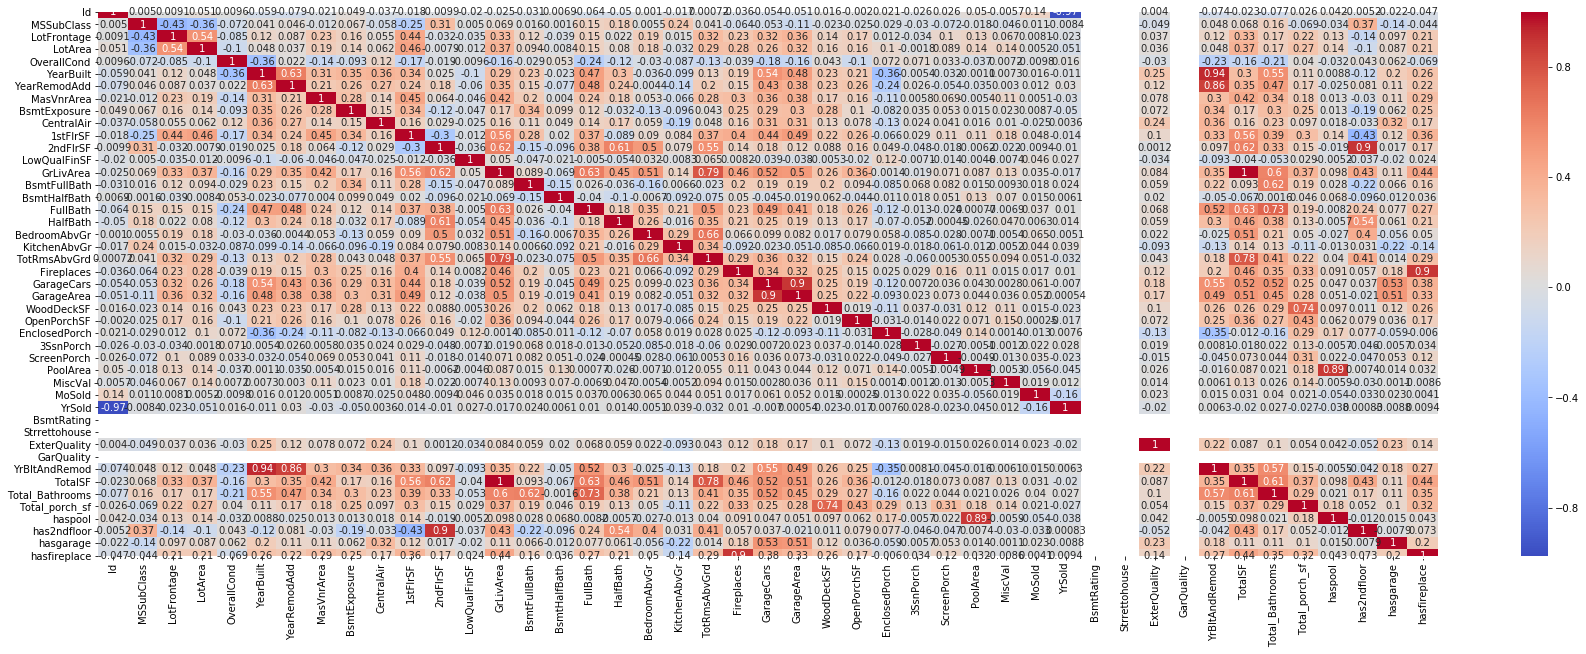

In [39]:
# to know the correlation between the each columns in dataset
plt.figure(figsize=(30,10))
sns.heatmap(data_test.corr(),cmap='coolwarm',annot = True)
plt.show()

In [40]:
#HeatingQC: 
titlemapping = {'Ex':5, 'Gd':4,'TA':3, 'Fa':2, 'Po':1, 'Na':0 }
for row in combine:
    row["HeatingQC"] = row["HeatingQC"].map(titlemapping)



Chckingggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggg

In [41]:
print(data_train.isnull().sum().head(60))
print(data_train.isnull().sum().tail(21))

#model = RandomForestRegressor(n_estimators = 300, random_state = 0)
#model.fit(x_train,y_train)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
MasVnrType         8
MasVnrArea         8
Foundation         0
BsmtExposure       0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageType         0
GarageFinish       0
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold       

In [42]:
#MasVnrType         

print(data_train['MasVnrType'].describe())
#MasVnrArea         
print(data_train['MasVnrArea'].describe())

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [43]:
#For INteger Values
mean = data_train['MasVnrArea'].median()
data_train['MasVnrArea'].fillna(mean, inplace=True)
data_test['MasVnrArea'].fillna(mean, inplace=True)

#For Object values

freq_port = data_train.MasVnrType.dropna().mode()[0]

for dataset in combine:
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna(freq_port)
   


In [44]:
print(data_train.isnull().sum().head(60))
print(data_train.isnull().sum().tail(21))

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
MasVnrType         0
MasVnrArea         0
Foundation         0
BsmtExposure       0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageType         0
GarageFinish       0
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold       

In [45]:
print(data_test.isnull().sum().head(60))
print(data_test.isnull().sum().tail(21))

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage        0
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
MasVnrType         0
MasVnrArea         0
Foundation         0
BsmtExposure       0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageType         0
GarageFinish       0
GarageCars         1
GarageArea         1
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold       

In [46]:
freq_port = data_test.MSZoning.dropna().mode()[0]
freq_port1 = data_test.SaleType.dropna().mode()[0]
for dataset in combine:
    dataset['MSZoning'] = dataset['MSZoning'].fillna(freq_port)
    dataset['SaleType'] = dataset['SaleType'].fillna(freq_port1)
   

In [47]:
median = data_test['BsmtFullBath'].median()
data_test['BsmtFullBath'].fillna(median, inplace=True)

median = data_test['BsmtHalfBath'].median()
data_test['BsmtHalfBath'].fillna(median, inplace=True)



median = data_test['BsmtFullBath'].median()
data_test['BsmtFullBath'].fillna(median, inplace=True)



median = data_test['GarageCars'].median()
data_test['GarageCars'].fillna(median, inplace=True)



median = data_test['GarageArea'].median()
data_test['GarageArea'].fillna(median, inplace=True)


median = data_test['Total_Bathrooms'].median()
data_test['Total_Bathrooms'].fillna(median, inplace=True)



In [48]:
print(data_test.isnull().sum().head(60))
print(data_test.isnull().sum().tail(21))

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
MasVnrType         0
MasVnrArea         0
Foundation         0
BsmtExposure       0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageType         0
GarageFinish       0
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold       

In [49]:
X_Train = data_train.drop("SalePrice",axis =1)
Y_Train = data_train["SalePrice"]
X_Test = data_test

X_Train.shape,Y_Train.shape,X_Test.shape

((1460, 62), (1460,), (1459, 62))

In [50]:
# to convert a categorical into one hot encoding
hot_one= pd.get_dummies(X_Train)

In [51]:
hot_one.shape

(1460, 149)

In [52]:
x_train ,x_test ,y_train ,y_test = train_test_split(hot_one, Y_Train, test_size = 0.3, random_state = 0)

5. Run the Random Forest Regression Model

In [53]:
model = RandomForestRegressor(n_estimators = 300, random_state = 0)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [60]:
Y_pred = model.predict(x_test)
Y_pred
model.score(x_train,y_train)
#model.score(X_Train, Y_Train)
acc_random_forest = round(model.score(x_train,y_train) * 100, 2)
acc_random_forest

97.6

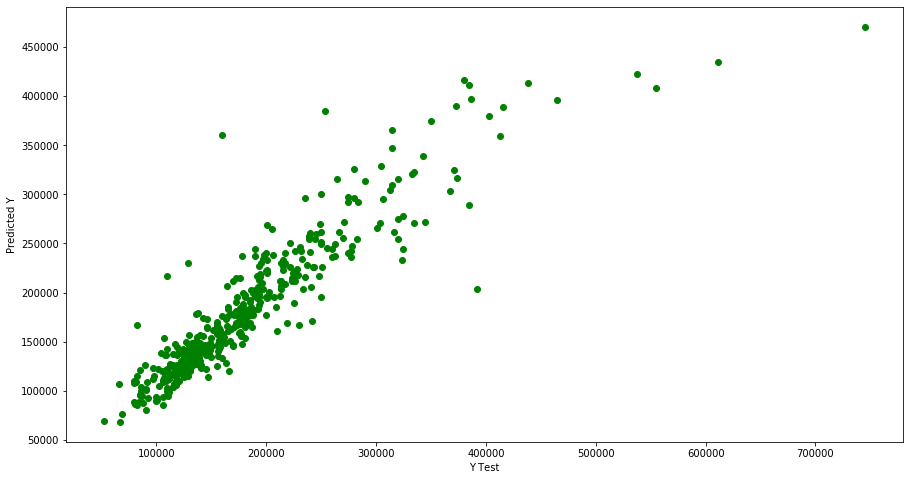

In [61]:
# how the model predicts against the actual known value
plt.figure(figsize=(15,8))
plt.scatter(y_test,Y_pred, c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

6. Run the Gradient Boosting Regression Model


In [62]:
from sklearn import ensemble
modell = ensemble.GradientBoostingRegressor(n_estimators = 3000, max_depth = 5,max_features='sqrt', min_samples_split = 10,
          learning_rate = 0.005,loss = 'huber',min_samples_leaf=15,random_state =42)
modell.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.005, loss='huber', max_depth=5,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
pred = modell.predict(x_test)

In [64]:
print('RMSE:', np.sqrt(mean_squared_log_error(y_test, pred)))

RMSE: 0.12942462362838453


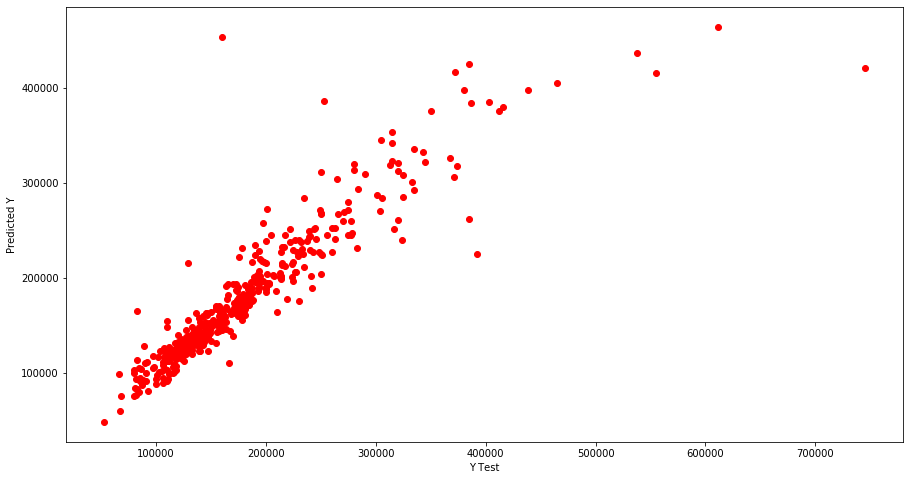

In [65]:
# how the model predicts against the actual known value
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [68]:
hot_two = pd.get_dummies(data_test)
test_pred_2 = modell.predict(hot_two)

In [70]:
test_pred = pd.DataFrame(test_pred_2, columns=['SalePrice'])
test_pred

,SalePrice
0,119315.980078
1,149178.597407
2,189691.942641
3,191481.775013
4,192984.225678
...,...
1454,87103.895285
1455,85924.005921
1456,153452.957489
1457,114841.737576


In [71]:
# Gradient Boosting has the low error as compare with Random Forest Regression
out = pd.DataFrame({'Id': hot_two['Id'], 'SalePrice': test_pred_2})
out.to_csv('HousePrediction_kaggle/submission.csv', index=False,header=True)